# Análisis y comparación de 'QuickSelect' sin y con aleatorización

A continuación, vamos a hacer un análisis del comportamiento del algoritmo **_QUICKSELECT_** y **_RANDOM QUICKSELECT_**, ya que se quiere demostrar cual es el impacto de la aleatorización. Según la teoría, el **_QUICKSELECT_** tiene un comportamiento en un caso promedio de $O(n)$, pero para el peor caso sería en $O(n^{2})$. Por ello, este comportamiento se arreglaría utilizando la aleatorización creando así el **_RANDOM QUICKSELECT_**. Se creará una gráfica "Tamaños de datos vs. Tiempo Total" en donde se podrá observar mediante puntos la diferencia entre **_QUICKSELECT_** y **_RANDOM QUICKSELECT_**.

En esta función utiliza la data situada en el Global Environment para una simulación de los punteros de C. Es necesario, ya que evita la manipulación de muchos datos retornados (como solución alterna se usa listas), y hace que el código sea más limpio y claro.

In [1]:
ref <- function(..., envir=parent.frame(), inherits=TRUE){
   
  cl <- match.call(expand.dots = TRUE)
  cl[c(1, match(c("envir", "inherits"), names(cl), 0L))] <- NULL
  
  for (x in as.list(cl)) {
    
    s <- substitute(x)
    sx <- do.call(substitute, list(s), envir=envir)
    dx <- deparse(sx)
    expr <- substitute(assign(dx, s, envir=parent.frame(), inherits=inherits))
    do.call(on.exit, list(expr, add=TRUE), envir=envir)
    
  }

  #Extraido de:
  #https://stackoverflow.com/questions/2603184/can-you-pass-by-reference-in-r

}

Esta función intercambia los valores de las posiciones $i$ y $j$ de un vector de datos $A$. No es necesario indicar una actualización o asignación del vector $A$, ya que utiliza la función **_ref_**.

In [2]:
CAMBIO <- function(A,i,j){
  
  ref(A)      #El valor mostrado esta referenciado, es decir que
              #si se modifica en la funcion se modifica el original
  
  a1 <- A[i]  #Se agrega el dato en una variable temporal
  a2 <- A[j]  #para evitar problemas con el compilador
  
  A <- replace(A,c(i,j),c(a2,a1)) #Se cambia con la funcion replace
}

Esta función lo que hace es acomodar los valores del vector $A$ de la posición $p$ hasta la $r$, utilizando un pívot como mediador, es decir, los valores menores que el pívot irán a la izquierda del pívot, mientras que los mayores a la derecha.

In [3]:
PARTICION <- function(A,p,r){

  ref(A)          #El valor mostrado esta referenciado
  x <- A[r]       #x es el pivot que es ultimo dato de la porcion seleccionada en A
  i <- p-1        #Es una posición anterior al primero, sirve para saber en que
                  #posicion se encuentra el menor mas cercano al pivot
  
  for(j in p:(r-1)){    #Va desde el primero hasta el penultimo
    
    if(A[j] <= x){      #Si es menor al pivot
      i <- i+1          #se aumenta en 1 y
      CAMBIO(A,i,j)     #se hace el cambio entre los valores de las posiciones i y j
    }
                        #No se realiza nada si es mayor
  }
  
  CAMBIO(A,i+1,r)       #Por ultimo se hace un intercambio entre el primer mayor
                        #y el pivot, de esta manera quedaria un vector de la forma:
                        #(menores que el pivot) + pivot + (mayores que el pivot)
  
  return(i+1)           #regresa la posición del pivot
  
}


Es la misma función que **_PARTICION_**, solo que aleatorizados la posición del pívot, es decir, se selecciona cualquiera al azar y se intercambia con el último. Luego se llama a **_PARTICION_**.

In [4]:
RANDOM.PARTICION <- function(A,p,r){
  
  ref(A)            #El valor mostrado esta referenciado
  
  ##random##*
  
  tem <- sample(p:r,1,replace = F)    #tem es un aleatorio que
  CAMBIO(A,r,tem)                     #se cambia con el último elemento del vector A
  
  ##########*
  
  PARTICION(A,p,r)          #se llama a PARTICION
  
}

Esta función arregla toda la cadena $A$ utilizando la función **_PARTICION_** en todas las partes del vector.  

In [5]:
QUICKSORT <- function(A,p=1,r=length(A)){       #los valores por defecto para facilitar el arreglo

  
  if(p < r){      #Si el tamaño del vector es lo suficientemente grande, es decir,
                  #no es vacio, es ejecuta el código, sino no.
    
    q <- PARTICION(A,p,r)       #Se ejecuta PARTICION y se devuelve la posicion del
                                #pivot (los cambios hechos en PARTICION afectaron a A,
                                #por eso no es necesario hacer un retorno).
    
    A <- QUICKSORT(A,p,q-1)     #Se hace una recurrencia, esta vez se analiza la seccion
                                #menores que el pivot.
    A <- QUICKSORT(A,q+1,r)     #Una vez terminado la parte izquierda, se procede a la
                                #derecha, es decir a los mayores.
    
  }
  return(A)             #se coloca return para que se entienda que es lo que retorna
                        
}

Esta función realiza la misma tarea que **_QUICKSORT_** solo que utiliza **_RANDOM.PARTCION_**

In [6]:
RANDOM.QUICKSORT <- function(A,p=1,r=length(A)){    #los valores por defecto para facilitar el arreglo

  if(p < r){
    
    q <- RANDOM.PARTICION(A,p,r)
    A <- RANDOM.QUICKSORT(A,p,q-1)
    A <- RANDOM.QUICKSORT(A,q+1,r)
    
  }
  return(A)             #se coloca return para que se entienda que es lo que retorna
                        #sin embargo no es necesario ya que 'A' esta por referencia
}

Esta función te devuelve el valor de la posición m del vector A ordenado desde $p$ hasta $r$. Se puede decir que encuentra el $m$-ésimo. No ordenado todo, solo lo necesario, ya que si la posición requerida es menor a la encontrada entonces se dirige a la izquierda o si es mayor a la derecha, no en ambos lados como el **_QUICKSORT_**. Al final, si coincide devuelve el valor.  

In [7]:
QUICKSELECT <- function(A,p=1,r=length(A),m=(r+p)/2){

  if(p == r){       #Si es de tamaño 1,
    return(A[p])    #devuelve ese único valor.
  }
  
  q <- PARTICION(A,p,r)     #Realiza PARTICION y q es pivot.
  
  if(m == q){       #Si q es igual a la posicion requerida m,
    return(A[q])    #devuelve ese valor.
  }
  else{             #De lo contrario
    
    if(m<q){        #Si la posicion requerida m es menor al pivot q,
      QUICKSELECT(A,p,q-1,m)  #se autoejecuta ahora solo para valores menores que
                              #el pivot(izquierda)
    }
    else{                     #Sino
      QUICKSELECT(A,q+1,r,m)  #se autoejecuta ahora solo para valores mayores que
                              #el pivot(derecha)
    }
    
  }
}

Es la misma función que el **_QUICKSELECT_**, solo que utiliza el **_RANDOM.PARTICION_** para aleatorizar.

In [8]:
RANDOM.QUICKSELECT <- function(A,p=1,r=length(A),m=(r+p)/2){
 
  if(p == r){
    return(A[p])
  }
  
  q <- RANDOM.PARTICION(A,p,r)
  
  if(m == q){
    return(A[q])
  }
  else{
    
    if(m<q){
      RANDOM.QUICKSELECT(A,p,q-1,m)
    }
    else{
      RANDOM.QUICKSELECT(A,q+1,r,m)
    }
    
  }
  
}

Esta función es una forma más segura de obtener la mediana, ya que funciona para vectores de tamaños impares y pares (especialmente los pares ya que se tiene que hacer un promedio)

In [9]:
MEDIANA.QSELECT <- function(A){
  
  if(length(A) %% 2 == 1){    #Si es impar
    med <- QUICKSELECT(A)     #se ejecuta QUICKSELECT
  }
  else{                       #sino
    med <- (QUICKSELECT(A,m=(length(A)/2)) + QUICKSELECT(A,m=(length(A)/2)+1))/2
                              #se hace un promedio de las dos posiciones centrales
  }
  return(med)     #Retorna el valor encontrado
}

Igual que el anterior, solo que utiliza **_RANDOM QUICKSELECT_**.

In [10]:
MEDIANA.RANDOM.QSELECT <- function(A){
  
  if(length(A) %% 2 == 1){
    med <- RANDOM.QUICKSELECT(A)
  }
  else{
    med <- (RANDOM.QUICKSELECT(A,m=(length(A)/2)) + RANDOM.QUICKSELECT(A,m=(length(A)/2)+1))/2
  }
  return(med)
}

Una vez definido las funciones iniciales se procede a la manipulación de los datos

En esta parte se utilizará un array llamado $tam$ que indica los tamaños de los vectores a crear, puede ser modificado a voluntad (incluir y excluir datos).

In [11]:
tam=c(500*1:30)

In [12]:
print(tam)

 [1]   500  1000  1500  2000  2500  3000  3500  4000  4500  5000  5500  6000
[13]  6500  7000  7500  8000  8500  9000  9500 10000 10500 11000 11500 12000
[25] 12500 13000 13500 14000 14500 15000


La $iteraciones$ sirven para realizar el mismo proceso la cantidad de veces y así hacer una comparación entre los datos.

In [13]:
iteraciones=5

Se crean los vectores donde se encontrarán los tiempos de ejecución para cada algoritmo. Se usa median() como comparación adicional.

In [14]:
vector.qs <- vector()             #tiempos de QUICKSELECT
vector.random.qs <- vector()      #tiempos de RANDOM-QUICKSELECT
vector.median <- vector()         #tiempos de median() de R

Se realiza operaciones necesarias para crear vectores y calcular los tiempos de ejecución.

In [15]:
for (j in 1:length(tam)){         #recorre desde el 1 hasta la cantidad de datos colocados en "tam"
    
    for (i in 1:iteraciones) {      #ejecuta "iteraciones" de veces

      A <- sample(1:50000,tam[j],replace=T)   #Crea un vector aleatorio de 1 a 50000
                                              #con tamaño tam[j] y se puede repetir

      B<-A                          #Se copia a B
      C<-A                          #Se copia a C

      t <- proc.time()              #Se inicia el tiempo
      med.QS <- MEDIANA.QSELECT(A)  #se ejecuta
      t <- proc.time()-t            #se devuelve el tiempo
      vector.qs <- rbind(vector.qs,t[3])  #Se agrega el valor t[3] en el vector
                                          #t[3] es el tiempo total

      t <- proc.time()
      med.RQS <- MEDIANA.RANDOM.QSELECT(B)
      t <- proc.time()-t
      vector.random.qs <- rbind(vector.random.qs,t[3])

      t <- proc.time()
      med.m <- median(C)
      t <- proc.time()-t
      vector.median <- rbind(vector.median,t[3])

    }
}

Una vez obtenido los vectores, se procede a arreglarlos dandole forma de matrix y colocando los nombres a las columnas para cada vector. También se crean vectores adicionales $y1$ ,$y2$ y $y3$ en donde estará el promedio de cada columna.

In [16]:
  vector.qs <- matrix(vector.qs,nrow=iteraciones,ncol=length(tam)) #devuelve una matrix
  colnames(vector.qs) <- tam              #nombra las columnas
  y1 <- colMeans(vector.qs)       #Se crea el vector que es el promedio de los valores
                                  #de toda la columna
  
  vector.random.qs <- matrix(vector.random.qs,nrow=iteraciones,ncol=length(tam))
  colnames(vector.random.qs) <- tam
  y2 <- colMeans(vector.random.qs)
  
  vector.median <- matrix(vector.median,nrow=iteraciones,ncol=length(tam))
  colnames(vector.median) <- tam
  y3 <- colMeans(vector.median)

In [17]:
print(y1)
print(y2)
print(y3)

   500   1000   1500   2000   2500   3000   3500   4000   4500   5000   5500 
0.0846 0.2020 0.2196 0.3232 0.4340 0.5286 0.4532 0.7282 0.8286 0.8370 0.9628 
  6000   6500   7000   7500   8000   8500   9000   9500  10000  10500  11000 
1.3124 1.4802 1.3438 1.2544 1.1848 1.6208 1.6786 1.6240 1.8296 1.5648 1.7466 
 11500  12000  12500  13000  13500  14000  14500  15000 
1.6982 1.6850 1.7254 1.8858 2.8688 2.3678 2.3402 1.9272 
   500   1000   1500   2000   2500   3000   3500   4000   4500   5000   5500 
0.0916 0.1458 0.2094 0.4114 0.3308 0.4338 0.4976 0.7966 0.7892 0.8242 0.9278 
  6000   6500   7000   7500   8000   8500   9000   9500  10000  10500  11000 
1.0072 1.1930 1.2496 1.1220 1.1862 1.3182 1.7104 1.9254 1.5162 1.6646 1.3954 
 11500  12000  12500  13000  13500  14000  14500  15000 
2.0434 1.7786 2.3696 2.1408 2.3478 2.6696 2.0712 2.0602 
  500  1000  1500  2000  2500  3000  3500  4000  4500  5000  5500  6000  6500 
2e-04 0e+00 2e-04 0e+00 6e-04 0e+00 0e+00 2e-04 2e-04 2e-04 8e-04 6e-

Aquí se crea la gráfica con los tres vectores $y1$, $y2$ y $y3$(tiempos) y $tam$(tamaños)

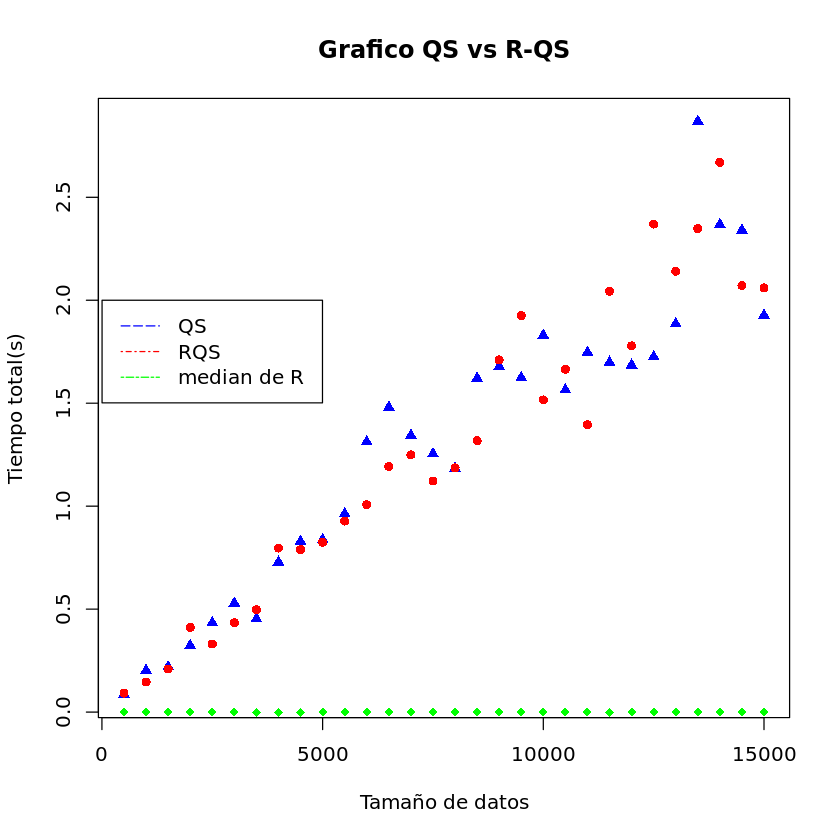

In [18]:
plot(tam,y1,pch=17,col="blue",xlab="Tamaño de datos",ylab="Tiempo total(s)",main="Grafico QS vs R-QS")
points(tam,y2,pch=16,col="red")
points(tam,y3,pch=18,col="green")
legend(x=3, y=2, legend=c("QS", "RQS","median de R"), lty=c(17,16,18),col=c("blue", "red","green"))

Como podemos ver los datos de **_QUICKSELECT_** tienden a estar más dispersos que los de **_RANDOM QUICKSELECT_**, hasta se puede ver una tendencia lineal más visible que **_QUICKSELECT_**. Por lo que se comprueba la duda de la complejidad $O(n)$ del algoritmo QUICKSELECT para caso promedio, es decir, aleatorizando para evitar el peor caso.
Se comprueba que la función **_median()_** incorporado en R tiende a ser constante ya que no importa si es 500 o 15000 datos, el tiempo es igual, el cual es un dato interesante, ya que la función **_median()_** utiliza el algoritmo **_RADIX SORT_** es con complejidad $O(n)$, por lo tanto debería de haber al menos un cambio al modificar $n$. Este será otro tema para analizar más adelante.
